In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
import numpy as np
import os, math
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [2]:
FILL_NA_VALUE = -1.0
NORMALIZE_RANGE = (-1.0,1.0)

sqrt_cols = []
target = 'id_13008_RGT_erfolgreich_1try'
drop_cols = ['id_01004_cut_tech',target]

In [3]:
data = pd.read_csv('TRUMPF_TruLaserCenter7030/TRUMPF_TruLaserCenter_Dataset_2018.csv',header=0)
df = pd.DataFrame(data)

# New heading

In [23]:
def normalizeFeature(data, f_min=NORMALIZE_RANGE[0], f_max=NORMALIZE_RANGE[1]):
    d_min, d_max = min(data), max(data)
    #print('dmax',d_max,'dmin',d_min)
    factor = (f_max - f_min) / (d_max - d_min)
    normalized = f_min + (data - d_min) * factor
    return normalized, factor

def cat_to_num(data):
    categories = np.unique(data)
    features = {}
    for cat in categories:
        binary = (data == cat)
        features["%s=%s" % (data.name, cat)] = binary.astype("int")
    return pd.DataFrame(features)

def check_data_for_nans(data):
    for col in data:
        try:
            np.unique(data[col],axis=1)
        except:
            print('column', col, 'One value is not compatible in this column ', data[col].values)

def weekday(string):
    day = string[0:2]
    month = string[3:5]
    year = string[6:10]
    ans = calendar.weekday((int)(year),(int)(month),(int)(day))
    return calendar.day_name[ans]

def pre_process(data,normalize,cat_feats=[]):
    df = pd.DataFrame()
 #   for feat in drop_cols:
 #       data.drop(feat,inplace=True)
    for feat in normalize:
        df[feat] = normalizeFeature(data[feat])[0]
    for feat in df:
        df[feat].fillna(0,inplace=True)
    for feat in cat_feats:
        df = df.join(cat_to_num(data[feat]))
    return data

In [24]:
basic = df.filter(regex='id_00', axis=1)
sheet = df.filter(regex='id_01', axis=1)
part = df.filter(regex='id_02', axis=1)
pin = df.filter(regex='id_03', axis=1)
other = df.filter(regex='id_1', axis=1)

#print('basic',basic.columns.values)
#print('sheet',sheet[0,:])
#print('part',part[0,:])
#print('pin',pin[0])
#print('other',other[0])
#list(basic.columns.values)
#print(part.columns.values)
#list(part.columns.values)
print(pin.columns.values)
#list(other.columns.values)
other_cols = ['id_13001_date',
 'id_13002_valid',
 'id_13007_poti',
 'id_13008_RGT_erfolgreich_1try']

sheet_cols = ['id_01001_density' 'id_01002_thickness' 'id_01003_emodul'
 'id_01004_cut_tech' 'id_01005_b_spalt' 'id_01006_zerschneidung_tafel'
 'id_01007_k_flex_s1' 'id_01008_k_flex_s2' 'id_01009_k_flex_s3']

basic_cols = ['id_00002_name_lst' 'id_00003_name_teil' 'id_00004_maschinennummer'
 'id_00005_entnum' 'id_00006_framework_version']

part_cols = ['id_02001_area' 'id_02002_U_a' 'id_02003_volume' 'id_02004_f_mass'
 'id_02005_zerschneidung_teil' 'id_02006_hullarea' 'id_02007_bbox_x'
 'id_02008_bbox_y' 'id_02009_l_HTmax' 'id_02010_U_ht' 'id_02011_U_ak'
 'id_02012_A_ak' 'id_02013_K_akf' 'id_02014_anz_hs_simple'
 'id_02015_dist_T_X_edge' 'id_02016_dist_SAT_X_edge' 'id_02017_dist_T_Y0'
 'id_02018_dist_SAT_Y0']

pin_cols = ['id_03001_pinarea' 'id_03002_F_Pges' 'id_03003_F_rel' 'id_03004_A_ueberd'
 'id_03005_K_ueberd' 'id_03006_Z_pushout_modus' 'id_03007_l_SAT_SHP'
 'id_03008_l_SAT_SP' 'id_03009_l_SKT_SP' 'id_03010_l_SKT_SHP'
 'id_03011_l_HT_HP' 'id_03012_l_HT_SP' 'id_03013_l_HT_SHP'
 'id_03014_l_HT_P' 'id_03015_SA_inP' 'id_03016_SKT_inP'
 'id_03017_l_biegekante' 'id_03018_A_biegung' 'id_03019_dist_biegung_SP'
 'id_03020_f_bieg' 'id_03021_K_ahp_at' 'id_03022_A_voronoi_max'
 'id_03023_A_stuetz_mean' 'id_03024_K_voronoi' 'id_03025_srel_HT_HP'
 'id_03026_srel_HT_SHP' 'id_03027_srel_HT_SP' 'id_03028_srel_HT_P'
 'id_03029_srel_SAT_SHP' 'id_03030_srel_SAT_SP' 'id_03031_srel_SKT_SP'
 'id_03032_srel_SKT_SHP' 'id_03033_lrel_HT_HP' 'id_03034_lrel_HT_SHP'
 'id_03035_lrel_HT_SP' 'id_03036_lrel_HT_P' 'id_03037_lrel_SAT_SHP'
 'id_03038_lrel_SAT_SP' 'id_03039_lrel_SKT_SP' 'id_03040_lrel_SKT_SHP'
 'id_03041_pininline' 'id_03042_dist_NH_kontur' 'id_03043_dist_NH_SA'
 'id_03044_dist_NH_SKT' 'id_03045_dist_NH_SP' 'id_03046_dist_NH_P'
 'id_03047_dist_NH_2P' 'id_03048_dist_NH_SKT_HS'
 'id_03049_dist_NH_SKT_HS_max' 'id_03050_kontur_in_E1'
 'id_03051_kontur_in_E2' 'id_03052_kontur_in_E3' 'id_03053_U_stuetz'
 'id_03054_rel_U_stuetz' 'id_03055_hs_gestuetzt' 'id_03056_K_relsum'
 'id_03057_l_BBT_PH_x' 'id_03058_l_BBT_PH_y' 'id_03059_D_Pin_Amin'
 'id_03060_D_Pin_Amax' 'id_03061_D_Pin_Umin' 'id_03062_D_Pin_Umax'
 'id_03063_B_N_E1']
all_cols = [basic_cols, sheet_cols,part_cols,pin_cols,other_cols]

['id_03001_pinarea' 'id_03002_F_Pges' 'id_03003_F_rel' 'id_03004_A_ueberd'
 'id_03005_K_ueberd' 'id_03006_Z_pushout_modus' 'id_03007_l_SAT_SHP'
 'id_03008_l_SAT_SP' 'id_03009_l_SKT_SP' 'id_03010_l_SKT_SHP'
 'id_03011_l_HT_HP' 'id_03012_l_HT_SP' 'id_03013_l_HT_SHP'
 'id_03014_l_HT_P' 'id_03015_SA_inP' 'id_03016_SKT_inP'
 'id_03017_l_biegekante' 'id_03018_A_biegung' 'id_03019_dist_biegung_SP'
 'id_03020_f_bieg' 'id_03021_K_ahp_at' 'id_03022_A_voronoi_max'
 'id_03023_A_stuetz_mean' 'id_03024_K_voronoi' 'id_03025_srel_HT_HP'
 'id_03026_srel_HT_SHP' 'id_03027_srel_HT_SP' 'id_03028_srel_HT_P'
 'id_03029_srel_SAT_SHP' 'id_03030_srel_SAT_SP' 'id_03031_srel_SKT_SP'
 'id_03032_srel_SKT_SHP' 'id_03033_lrel_HT_HP' 'id_03034_lrel_HT_SHP'
 'id_03035_lrel_HT_SP' 'id_03036_lrel_HT_P' 'id_03037_lrel_SAT_SHP'
 'id_03038_lrel_SAT_SP' 'id_03039_lrel_SKT_SP' 'id_03040_lrel_SKT_SHP'
 'id_03041_pininline' 'id_03042_dist_NH_kontur' 'id_03043_dist_NH_SA'
 'id_03044_dist_NH_SKT' 'id_03045_dist_NH_SP' 'id_03046_

In [25]:
newdata = data.copy()
#newdata = pre_process(newdata)


#check_data_for_nans(data)


# Plots

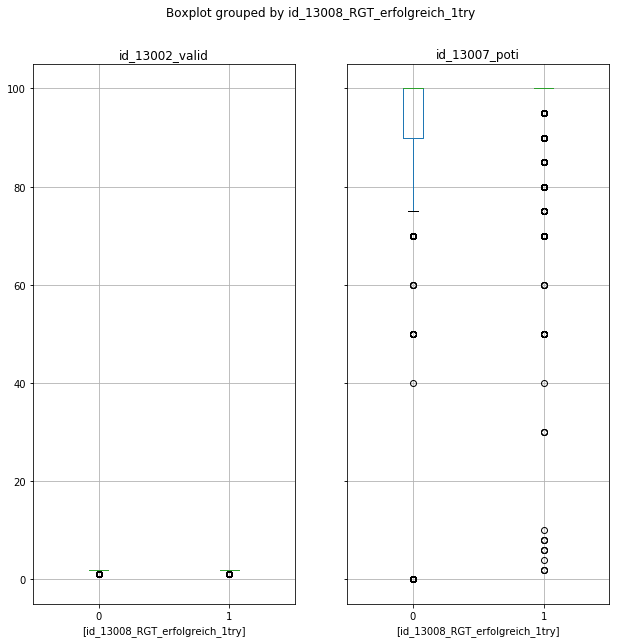

In [26]:
plt.rcParams['figure.figsize'] = (10,10)
#plt.ylim((10,75))
plot_selection = newdata[other_cols].copy()
bp = plot_selection.boxplot(by=target)

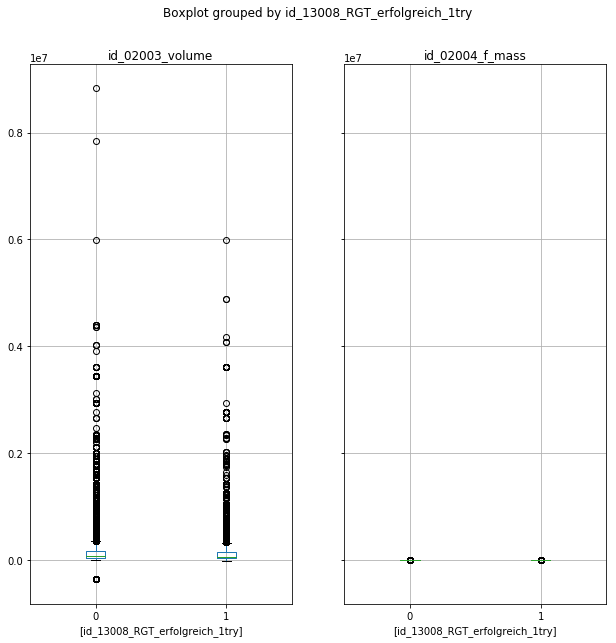

In [14]:
plot_selection = newdata[['id_02003_volume','id_02004_f_mass',target]].copy()
bp = plot_selection.boxplot(by=target)
x = df.columns.to_series().groupby(df.dtypes).groups
normalize = ['id_00005_entnum', 'id_01003_emodul', 'id_02014_anz_hs_simple',
        'id_03002_F_Pges', 'id_03006_Z_pushout_modus', 'id_03015_SA_inP',
        'id_03016_SKT_inP', 'id_03018_A_biegung', 'id_03022_A_voronoi_max',
        'id_03023_A_stuetz_mean', 'id_03041_pininline', 'id_03047_dist_NH_2P',
        'id_03055_hs_gestuetzt', 'id_03063_B_N_E1', 'id_13002_valid',
        'id_13007_poti', 'id_13008_RGT_erfolgreich_1try','id_01001_density', 'id_01002_thickness', 'id_01005_b_spalt',
        'id_01006_zerschneidung_tafel', 'id_01007_k_flex_s1',
        'id_01008_k_flex_s2', 'id_01009_k_flex_s3', 'id_02001_area',
        'id_02002_U_a', 'id_02003_volume', 'id_02004_f_mass',
        'id_02005_zerschneidung_teil', 'id_02006_hullarea', 'id_02007_bbox_x',
        'id_02008_bbox_y', 'id_02009_l_HTmax', 'id_02010_U_ht', 'id_02011_U_ak',
        'id_02012_A_ak', 'id_02013_K_akf', 'id_02015_dist_T_X_edge',
        'id_02016_dist_SAT_X_edge', 'id_02017_dist_T_Y0',
        'id_02018_dist_SAT_Y0', 'id_03001_pinarea', 'id_03003_F_rel',
        'id_03004_A_ueberd', 'id_03005_K_ueberd', 'id_03007_l_SAT_SHP',
        'id_03008_l_SAT_SP', 'id_03009_l_SKT_SP', 'id_03010_l_SKT_SHP',
        'id_03011_l_HT_HP', 'id_03012_l_HT_SP', 'id_03013_l_HT_SHP',
        'id_03014_l_HT_P', 'id_03017_l_biegekante', 'id_03019_dist_biegung_SP',
        'id_03020_f_bieg', 'id_03021_K_ahp_at', 'id_03024_K_voronoi',
        'id_03025_srel_HT_HP', 'id_03026_srel_HT_SHP', 'id_03027_srel_HT_SP',
        'id_03028_srel_HT_P', 'id_03029_srel_SAT_SHP', 'id_03030_srel_SAT_SP',
        'id_03031_srel_SKT_SP', 'id_03032_srel_SKT_SHP', 'id_03033_lrel_HT_HP',
        'id_03034_lrel_HT_SHP', 'id_03035_lrel_HT_SP', 'id_03036_lrel_HT_P',
        'id_03037_lrel_SAT_SHP', 'id_03038_lrel_SAT_SP', 'id_03039_lrel_SKT_SP',
        'id_03040_lrel_SKT_SHP', 'id_03042_dist_NH_kontur',
        'id_03043_dist_NH_SA', 'id_03044_dist_NH_SKT', 'id_03045_dist_NH_SP',
        'id_03046_dist_NH_P', 'id_03048_dist_NH_SKT_HS',
        'id_03049_dist_NH_SKT_HS_max', 'id_03050_kontur_in_E1',
        'id_03051_kontur_in_E2', 'id_03052_kontur_in_E3', 'id_03053_U_stuetz',
        'id_03054_rel_U_stuetz', 'id_03056_K_relsum', 'id_03057_l_BBT_PH_x',
        'id_03058_l_BBT_PH_y', 'id_03059_D_Pin_Amin', 'id_03060_D_Pin_Amax',
        'id_03061_D_Pin_Umin', 'id_03062_D_Pin_Umax']
cat_to_num = ['id_00002_name_lst', 'id_00003_name_teil',
        'id_00004_maschinennummer', 'id_00006_framework_version',
        'id_01004_cut_tech', 'id_13001_date']
#'DataID', 
#newdata.drop('DataID',inplace=True)

In [20]:

trainc = pre_process(newdata,normalize,cat_feats=[])

In [27]:
#For training

train_features = trainc[:int(0.8*len(trainc))].copy()
train_target = newdata[:int(0.8*len(newdata))].copy()
train_target = train_target[[target]]
#train_target = train_features[target]
#train_features  = train_features.drop(target).copy()
#print(train_features)
#For testing
test_features = trainc[int(0.8*len(trainc)):].copy()
test_target = newdata[int(0.8*len(newdata)):].copy()
test_target = test_target[[target]]
test_features[target] = test_target[target]

#test_target = test_features[target]
#test_features.drop([target],inplace=True)

In [28]:
model_svm = SVC()

In [29]:
model_svm.fit(train_features,train_target)

ValueError: could not convert string to float: '14.08.2018 06:40:53:971'

In [ ]:
predictions_svm = predict(model, test_features)

In [ ]:
print('support vector machine Score:' ,model_svm.score(test_features, test_target))


In [ ]:
trainc = trainc[['DataID', 'id_00002_name_lst', 'id_00003_name_teil',
       'id_00004_maschinennummer', 'id_00005_entnum',
       'id_00006_framework_version', 'id_01001_density',
       'id_01002_thickness', 'id_01003_emodul', 'id_01004_cut_tech',
       'id_01005_b_spalt', 'id_01006_zerschneidung_tafel',
       'id_01007_k_flex_s1', 'id_01008_k_flex_s2', 'id_01009_k_flex_s3',
       'id_02001_area', 'id_02002_U_a', 'id_02003_volume',
       'id_02004_f_mass', 'id_02005_zerschneidung_teil
       'id_02006_hullarea', 'id_02007_bbox_x', 'id_02008_bbox_y',
       'id_02009_l_HTmax', 'id_02010_U_ht', 'id_02011_U_ak',
       'id_02012_A_ak', 'id_02013_K_akf', 'id_02014_anz_hs_simple',
       'id_02015_dist_T_X_edge', 'id_02016_dist_SAT_X_edge',
       'id_02017_dist_T_Y0', 'id_02018_dist_SAT_Y0', 'id_03001_pinarea',
       'id_03002_F_Pges', 'id_03003_F_rel', 'id_03004_A_ueberd',
       'id_03005_K_ueberd', 'id_03006_Z_pushout_modus',
       'id_03007_l_SAT_SHP', 'id_03008_l_SAT_SP', 'id_03009_l_SKT_SP',
       'id_03010_l_SKT_SHP', 'id_03011_l_HT_HP', 'id_03012_l_HT_SP',
       'id_03013_l_HT_SHP', 'id_03014_l_HT_P', 'id_03015_SA_inP',
       'id_03016_SKT_inP', 'id_03017_l_biegekante', 'id_03018_A_biegung',
       'id_03019_dist_biegung_SP', 'id_03020_f_bieg', 'id_03021_K_ahp_at',
       'id_03022_A_voronoi_max', 'id_03023_A_stuetz_mean',
       'id_03024_K_voronoi', 'id_03025_srel_HT_HP',
       'id_03026_srel_HT_SHP', 'id_03027_srel_HT_SP',
       'id_03028_srel_HT_P', 'id_03029_srel_SAT_SHP',
       'id_03030_srel_SAT_SP', 'id_03031_srel_SKT_SP',
       'id_03032_srel_SKT_SHP', 'id_03033_lrel_HT_HP',
       'id_03034_lrel_HT_SHP', 'id_03035_lrel_HT_SP',
       'id_03036_lrel_HT_P', 'id_03037_lrel_SAT_SHP',
       'id_03038_lrel_SAT_SP', 'id_03039_lrel_SKT_SP',
       'id_03040_lrel_SKT_SHP', 'id_03041_pininline',
       'id_03042_dist_NH_kontur', 'id_03043_dist_NH_SA',
       'id_03044_dist_NH_SKT', 'id_03045_dist_NH_SP',
       'id_03046_dist_NH_P', 'id_03047_dist_NH_2P',
       'id_03048_dist_NH_SKT_HS', 'id_03049_dist_NH_SKT_HS_max',
       'id_03050_kontur_in_E1', 'id_03051_kontur_in_E2',
       'id_03052_kontur_in_E3', 'id_03053_U_stuetz',
       'id_03054_rel_U_stuetz', 'id_03055_hs_gestuetzt',
       'id_03056_K_relsum', 'id_03057_l_BBT_PH_x', 'id_03058_l_BBT_PH_y',
       'id_03059_D_Pin_Amin', 'id_03060_D_Pin_Amax',
       'id_03061_D_Pin_Umin', 'id_03062_D_Pin_Umax', 'id_03063_B_N_E1',
       'id_13001_date', 'id_13002_valid', 'id_13007_poti']].copy()

# New heading